In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# List of file paths
file_paths = ["f814w_phot_table_data.csv", "f555w_phot_table_data.csv", "f438w_phot_table_data.csv","f336w_phot_table_data.csv"]

# Create a dictionary of DataFrames
dataframes_dict = {f"df_{i+1}": pd.read_csv(file) for i, file in enumerate(file_paths)}


In [10]:
f336w_f438w = np.array([row['residual_flux'] for index, row in dataframes_dict['df_4'].iterrows()])
for index, row in dataframes_dict['df_3'].iterrows() :
    mag336 = -2.5*np.log10(f336w_f438w[index]*4.6953687e-7)+(-1.158-0.0897-0.73)
    mag438 = -2.5*np.log10(row['residual_flux']*4.15604575e-7)+(0.178-0.0732-0.64)
    f336w_f438w[index] = mag336-mag438

# print(f336w_f438w)

f555w_f814w = np.array([row['residual_flux'] for index, row in dataframes_dict['df_2'].iterrows()])
for index, row in dataframes_dict['df_1'].iterrows() :
    mag555 = -2.5*np.log10(f555w_f814w[index]*1.7128159e-7)+(0.048-0.0556-0.61)
    mag814 = -2.5*np.log10(row['residual_flux']*3.2380001e-7)+(-0.395-0.0301-0.73)
    f555w_f814w[index] = mag555-mag814

# print(f555w_f814w)

C:\Users\aarus\AppData\Local\Temp\ipykernel_6032\2844003570.py:3: RuntimeWarning: invalid value encountered in log10
  mag336 = -2.5*np.log10(f336w_f438w[index]*4.6953687e-7)+(-1.158-0.0897-0.73)


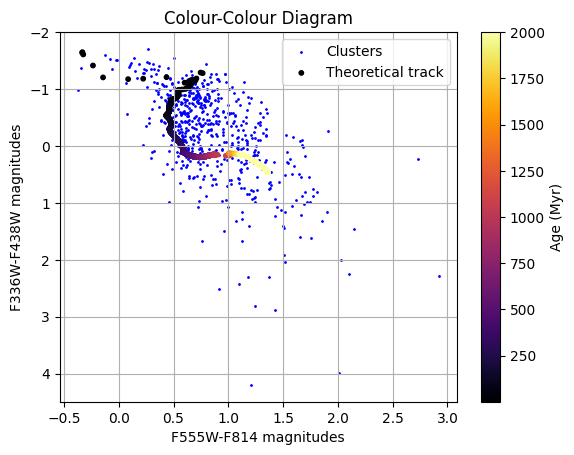

In [11]:
# Plot the arrays
plt.scatter(f555w_f814w,f336w_f438w, s=1, marker='o', color='b', label = 'Clusters')

ub_data = np.load('model_ub_sol.npy')
vi_data = np.load('model_vi_sol.npy')
age_model = np.load('age_mod_sol.npy')

# Add labels, title, and legend
plt.xlabel('F555W-F814 magnitudes')
plt.ylabel('F336W-F438W magnitudes')
plt.title('Colour-Colour Diagram')
model_data = plt.scatter(vi_data, ub_data, c=age_model, vmax=2000, cmap= 'inferno', s=10, label='Theoretical track')
cbar = plt.colorbar(model_data, label = 'Age (Myr)')

plt.gca().invert_yaxis()
plt.legend()

# Show the plot
plt.grid(True)  # Optional grid
plt.show()


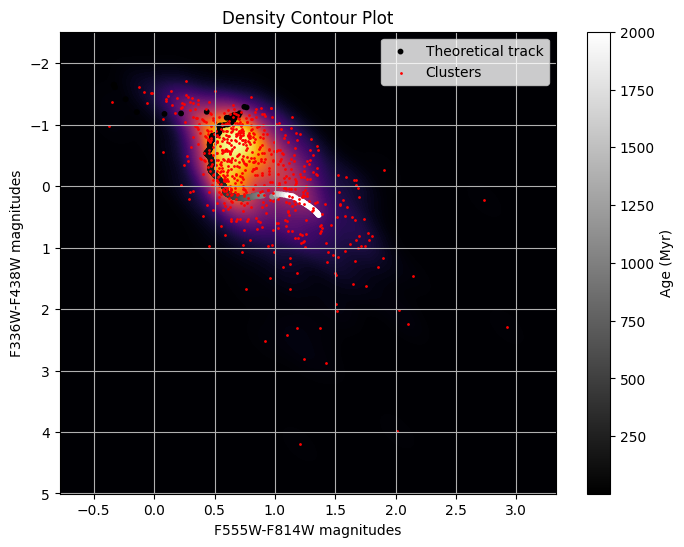

In [12]:
import seaborn as sns

# Density plot using seaborn
plt.figure(figsize=(8, 6))
sns.kdeplot(x=f555w_f814w, y=f336w_f438w, cmap="inferno", fill=True, thresh=0, levels=100)

# Overlay theoretical track
model_data = plt.scatter(vi_data, ub_data, c=age_model, vmax=2000, cmap= 'grey', s=10, label='Theoretical track')
cbar = plt.colorbar(model_data, label = 'Age (Myr)')

# Overlay actual data
plt.scatter(f555w_f814w,f336w_f438w, s=1, marker='o', color='r', label = 'Clusters')

# Add labels, title, and legend
plt.xlabel('F555W-F814W magnitudes')
plt.ylabel('F336W-F438W magnitudes')
plt.title('Density Contour Plot')
plt.gca().invert_yaxis()
plt.legend()

# Show plot
plt.grid(True)  # Optional grid
plt.show()

In [16]:
from astropy.io import fits

# Load galaxy FITS file
galaxy_fits =r"C:\Users\aarus\Downloads\hlsp_phangs-hst_hst_wfc3-uvis_ngc1365_multi_v1_drc-bundle\ngc1365\hlsp_phangs-hst_hst_wfc3-uvis_ngc1365_f814w_v1_exp-drc-sci.fits"
hdul = fits.open(galaxy_fits)
galaxy_data = hdul[0].data
hdul.close()

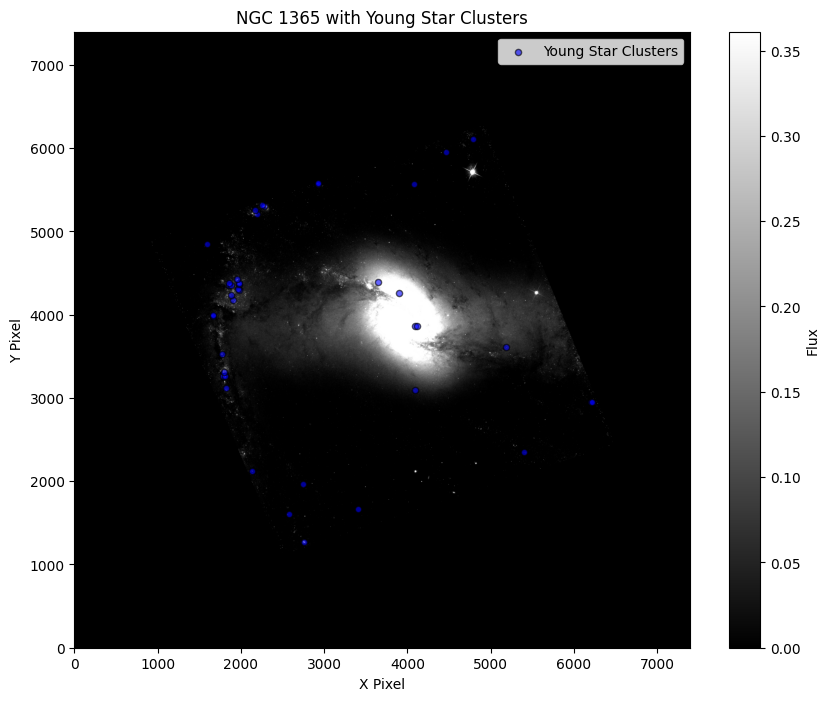

In [32]:
x_young_stars = np.array([])
y_young_stars = np.array([])
for i in range(len(f555w_f814w)):
    if f336w_f438w[i] < -1.15 and f555w_f814w[i]<0.75:
        x_young_stars = np.append(x_young_stars, dataframes_dict['df_1'].loc[i]['xcenter'])
        y_young_stars = np.append(y_young_stars, dataframes_dict['df_1'].loc[i]['ycenter'])

plt.figure(figsize=(10, 8))
plt.imshow(galaxy_data, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(galaxy_data,99))
plt.colorbar(label='Flux')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.title('NGC 1365 with Young Star Clusters')

# Overlay star clusters
plt.scatter(x_young_stars, y_young_stars, c='blue', edgecolors='black', s=20, alpha=0.6, label='Young Star Clusters')
plt.legend()
plt.show()



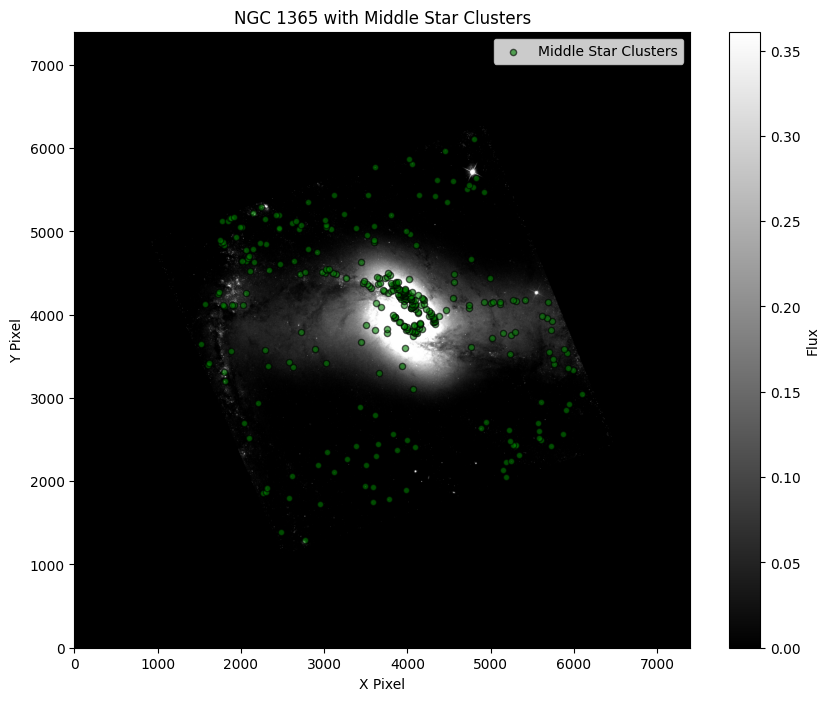

In [20]:
x_middle_stars = np.array([])
y_middle_stars = np.array([])
for i in range(len(f555w_f814w)):
    if (f336w_f438w[i] > -1.15 and f336w_f438w[i]<0.25) and (f555w_f814w[i] < 1 and f555w_f814w[i]>0.4):
        x_middle_stars = np.append(x_middle_stars, dataframes_dict['df_1'].loc[i]['xcenter'])
        y_middle_stars = np.append(y_middle_stars, dataframes_dict['df_1'].loc[i]['ycenter'])

plt.figure(figsize=(10, 8))
plt.imshow(galaxy_data, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(galaxy_data,99))
plt.colorbar(label='Flux')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.title('NGC 1365 with Middle Star Clusters')

# Overlay star clusters
plt.scatter(x_middle_stars, y_middle_stars, c='green', edgecolors='black', s=20, alpha=0.6, label='Middle Star Clusters')
plt.legend()
plt.show()



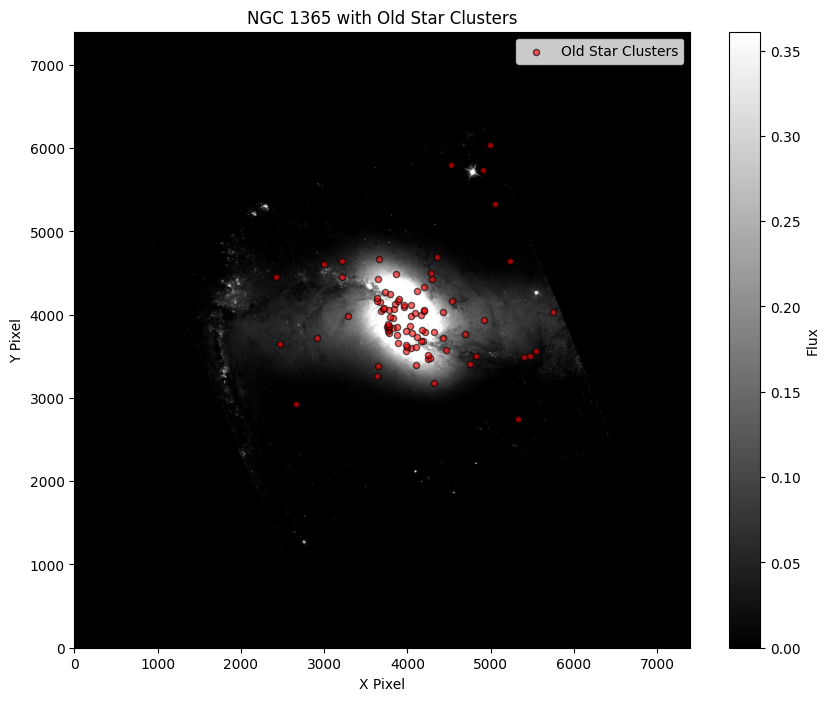

In [ ]:
x_old_stars = np.array([])
y_old_stars = np.array([])
for i in range(len(f555w_f814w)):
    if f336w_f438w[i]>0.25 and f555w_f814w[i] > 1:
        x_old_stars = np.append(x_old_stars, dataframes_dict['df_1'].loc[i]['xcenter'])
        y_old_stars = np.append(y_old_stars, dataframes_dict['df_1'].loc[i]['ycenter'])

plt.figure(figsize=(10, 8))
plt.imshow(galaxy_data, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(galaxy_data,99))
plt.colorbar(label='Flux')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.title('NGC 1365 with Old Star Clusters')

# Overlay star clusters
plt.scatter(x_old_stars, y_old_stars, c='red', edgecolors='black', s=20, alpha=0.6, label='Old Star Clusters')
plt.legend()
plt.show()

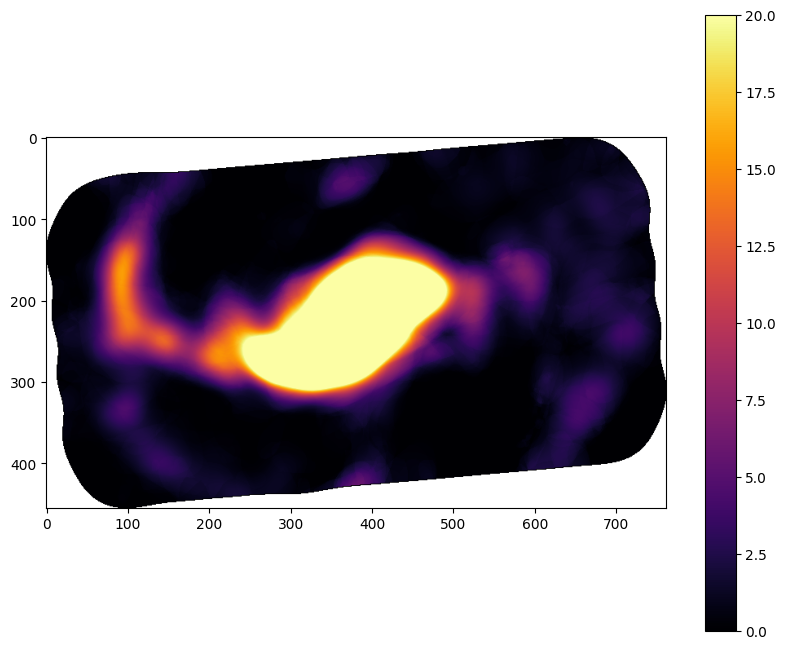

In [24]:
gas = fits.open(r'C:\Users\aarus\Downloads\ngc1365_gas_distribution.fits')
distribution = gas[0].data

plt.figure(figsize=(10,8))
plt.imshow(distribution, vmax=20, vmin=0, cmap='inferno')
plt.colorbar()
plt.show()

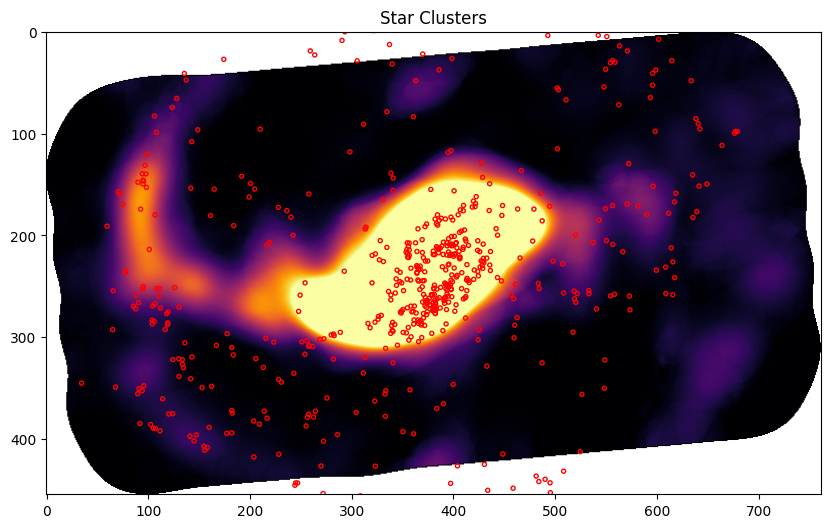

In [55]:
cluster_fits = r"C:\Users\aarus\Downloads\hlsp_phangs-cat_hst_acs-uvis_ngc1365_multi_v1_cats\catalogs\hlsp_phangs-cat_hst_uvis_ngc1365_multi_v1_obs-human-cluster-class12.fits"
hdul = fits.open(cluster_fits)
cluster_data = hdul[1].data

# Extract relevant parameters from FITS header
main_ra, main_dec = gas[0].header['CRVAL1'], gas[0].header['CRVAL2']
error_ra, error_dec = gas[0].header['CDELT1'], gas[0].header['CDELT2']
pixel1, pixel2 = gas[0].header['CRPIX1'], gas[0].header['CRPIX2']

# Convert cluster data to numpy arrays
cluster_ra, cluster_dec = np.array(cluster_data.PHANGS_RA), np.array(cluster_data.PHANGS_DEC)

# Calculate pixel coordinates
p1 = pixel1 + (cluster_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
p2 = pixel2 + (cluster_dec - main_dec) / error_dec
positions = np.array(list(zip(p1, p2)))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Display the image
ax.imshow(distribution, vmin=0, vmax=20, cmap='inferno')

# Add circles to the plot
for x, y in zip(p1, p2):
    circle = plt.Circle((x, y), radius=2, edgecolor='r', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.title('Star Clusters')
plt.show()

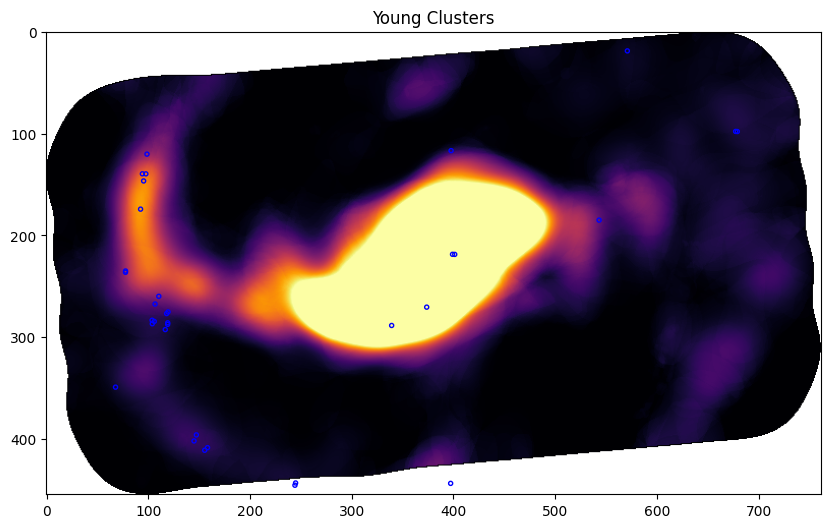

In [56]:
young_stars = []
for i in range(len(f336w_f438w)):
    if f336w_f438w[i] < -1.15 and f555w_f814w[i] < 0.75:
        young_stars.append(positions[i])
        
young_stars = np.array(young_stars)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Display the image
ax.imshow(distribution, vmin=0, vmax=20, cmap='inferno')

# Add circles to the plot
for x, y in young_stars:
    circle = plt.Circle((x, y), radius=2, edgecolor='b', facecolor='None')
    ax.add_artist(circle)

# Add the title and show the plot
plt.title('Young Clusters')
plt.show()


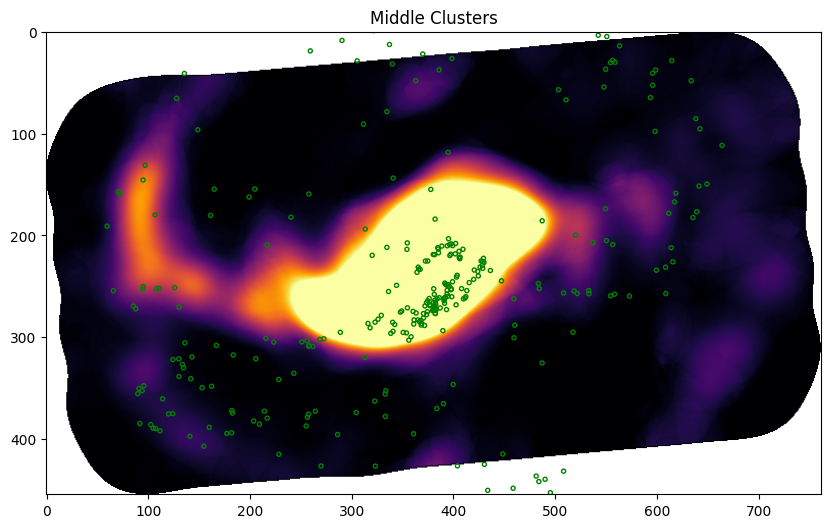

In [59]:
middle_stars = []
for i in range(len(f336w_f438w)):
    if (f336w_f438w[i] > -1.15 and f336w_f438w[i]<0.25) and (f555w_f814w[i] < 1 and f555w_f814w[i]>0.4):
        middle_stars.append(positions[i])
        
middle_stars = np.array(middle_stars)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Display the image
ax.imshow(distribution, vmin=0, vmax=20, cmap='inferno')

# Add circles to the plot
for x, y in middle_stars:
    circle = plt.Circle((x, y), radius=2, edgecolor='g', facecolor='None')
    ax.add_artist(circle)

# Add the title and show the plot
plt.title('Middle Clusters')
plt.show()

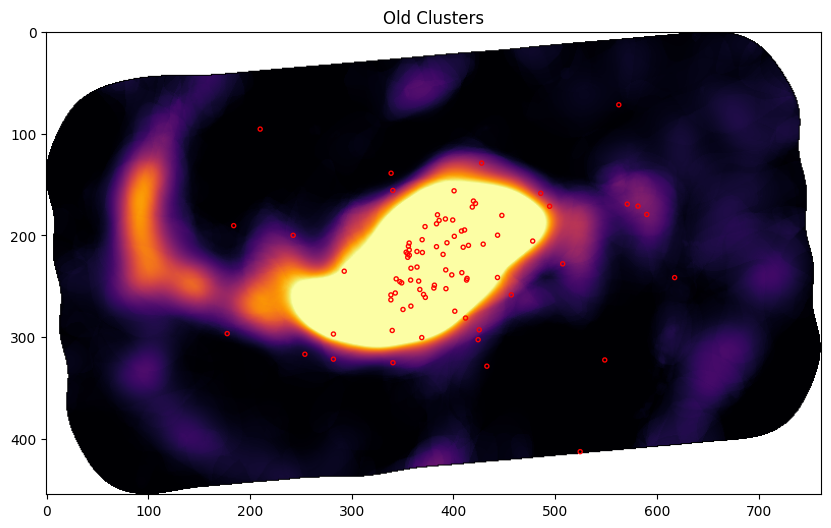

In [60]:
old_stars = []
for i in range(len(f336w_f438w)):
    if f336w_f438w[i]>0.25 and f555w_f814w[i] > 1:
        old_stars.append(positions[i])
        
old_stars = np.array(old_stars)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Display the image
ax.imshow(distribution, vmin=0, vmax=20, cmap='inferno')

# Add circles to the plot
for x, y in old_stars:
    circle = plt.Circle((x, y), radius=2, edgecolor='r', facecolor='None')
    ax.add_artist(circle)

# Add the title and show the plot
plt.title('Old Clusters')
plt.show()